In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met, u_statistics, u_plot
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [410]:
path = cnst.network_data + '/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/init_merged/'

In [632]:
msgopen = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/init_merged/cores_gt15000km2_table_AMSRE_tracking_17_init.csv', na_values=-999)

##  Wet / Dry case comparison

Wet: Day 0 / Day -1 > + 0.01% SM anomaly mean (more like 'neutral & wet condition')

Dry: Day  0 < -3% , Day-1 < -1.5% SM anomaly mean

Identified in box + - 90 km and 200km upstream from core centre

In [633]:
msgopen.shape

(9532, 29)

In [634]:
print('Number of ALL cases:', msgopen.shape[0])

Number of ALL cases: 9532


In [635]:
#dry = msgopen[(msgopen['SMmean0']<-3)& (msgopen['SMmean-1'] <-1.5) &(msgopen['SMmean0']>-900)& (msgopen['SMmean-1'] >-900) ]
msgopen = msgopen[(msgopen['lat']>9.5) & (msgopen['lat']<20.5) & (msgopen['topo']<=450) & (msgopen['dtime']<=2)]##  & (msgopen['ERAqmean']>14.8) & (msgopen['ERAqmean']<16.5)]

In [636]:
len(msgopen)

6637

In [637]:
np.min(msgopen['lat'])

10.278089448606256

In [638]:
#propagating:
len(msgopen[(msgopen['xdiff']>=100) | (msgopen['initTime'] <= 2.5)])

4446

In [639]:
#propagation filter
propagation = msgopen[((msgopen['xdiff']>=100) | (msgopen['initTime'] <= 2.5))]

In [640]:
#Centiles of SMA without day-1 filter, representative of histogram filter
print(np.percentile(propagation['SMmean0'], [10,90]))
print(np.percentile(propagation['SMmean0'], [25,75]))

[-6.87995486  1.64135867]
[-4.62306224 -0.31815871]


In [641]:
#propagation = propagation[propagation['lat']<=16]

(array([ 478.,    0.,    0.,  986.,    0.,    0., 1815.,    0.,    0.,
        1167.]),
 array([6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <a list of 10 Patch objects>)

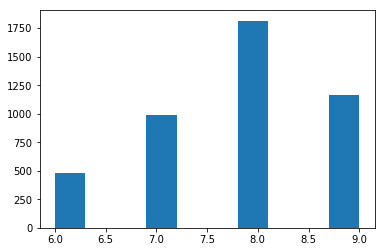

In [642]:
plt.hist(propagation['month'])

(array([715., 832., 717., 710., 487., 309., 313., 214., 100.,  49.]),
 array([10.27808945, 11.19012577, 12.10216208, 13.0141984 , 13.92623472,
        14.83827103, 15.75030735, 16.66234366, 17.57437998, 18.4864163 ,
        19.39845261]),
 <a list of 10 Patch objects>)

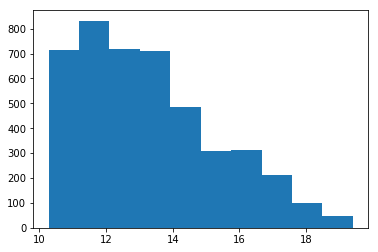

In [643]:
plt.hist(propagation['lat'])

(array([ 69.,  87.,  94., 166., 336., 767., 892., 714., 377., 289.]),
 array([14.  , 14.21, 14.42, 14.63, 14.84, 15.05, 15.26, 15.47, 15.68,
        15.89, 16.1 ]),
 <a list of 10 Patch objects>)

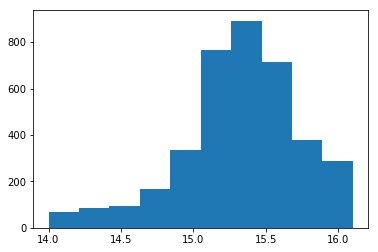

In [644]:
plt.hist(propagation['ERAqmean'], range=(14,16.1))

In [645]:
#including day-1 filter
len(propagation[np.isfinite(propagation['SMmean0']) & np.isfinite(propagation['SMmean-1'])])

2112

In [646]:
wetness = propagation[np.isfinite(propagation['SMmean0']) & np.isfinite(propagation['SMmean-1'])]

In [647]:
len(wetness)

2112

In [473]:
np.percentile(wetness['SMmean0'], [10,90])

array([-7.25282575,  1.11802815])

In [648]:
np.percentile(wetness['SMmean0'], [25,75])

array([-5.32413924, -0.73099702])

In [649]:
wetness

,id,id.1,year,month,day,hour,lon,lat,xloc,yloc,...,SMdry-1,SMwet-1,LSTAmean,LSTAslotfrac,dtime,ERAqmean,initTime,xinit,yinit,xdiff
64,64,183,2006,6,7,17,-4.250857,11.653897,453,281,...,0.0,1.0,1.665922,1.000000,2.0,14.95,2.5,718.0,285.0,265.0
65,65,186,2006,6,7,17,-5.104256,11.919413,423,290,...,0.0,1.0,2.494214,1.000000,1.0,14.91,2.5,718.0,285.0,295.0
66,66,187,2006,6,7,17,-5.463582,11.963640,410,291,...,0.0,1.0,2.797156,1.000000,0.0,14.91,2.5,718.0,285.0,308.0
67,67,191,2006,6,7,17,-3.846615,12.273024,468,303,...,0.0,1.0,2.050466,1.000000,2.0,14.55,2.5,718.0,285.0,250.0
68,68,193,2006,6,7,17,-5.373751,12.449650,414,309,...,0.0,1.0,4.725095,1.000000,0.0,14.51,2.5,718.0,285.0,304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,9527,19432,2010,9,28,17,-5.643245,13.814258,405,357,...,0.0,1.0,-0.849622,0.141558,0.0,15.70,2.0,NaN,NaN,NaN
9528,9528,19433,2010,9,28,17,-5.912740,14.165138,396,369,...,0.0,1.0,-1.450397,0.120779,0.0,15.33,2.0,NaN,NaN,NaN
9529,9529,19434,2010,9,28,17,-5.912740,14.252773,396,372,...,0.0,1.0,-1.823011,0.123377,0.0,15.22,2.0,NaN,NaN,NaN
9530,9530,19435,2010,9,28,17,-5.688161,14.252773,404,372,...,0.0,1.0,-1.947288,0.128571,0.0,15.26,2.0,NaN,NaN,NaN


In [650]:
wetness.keys()

Index(['id', 'id.1', 'year', 'month', 'day', 'hour', 'lon', 'lat', 'xloc',
       'yloc', 'area', 'csize', 't', 'storm_id', 'topo', 'SMmean0', 'SMdry0',
       'SMwet0', 'SMmean-1', 'SMdry-1', 'SMwet-1', 'LSTAmean', 'LSTAslotfrac',
       'dtime', 'ERAqmean', 'initTime', 'xinit', 'yinit', 'xdiff'],
      dtype='object')

In [746]:
print(np.percentile(wetness['SMmean0'],[10,90]))
print(np.percentile(wetness['SMmean0'],[25,50,75]))
print(np.percentile(wetness['SMmean0'],[20,50,80]))

[-7.25282575  1.11802815]
[-5.32413924 -2.82106573 -0.73099702]
[-5.84019879 -2.82106573 -0.24371757]


In [667]:
np.sum((wetness['SMmean0']<=-5.4))

509

In [670]:
np.sum((wetness['SMmean0']>=-0.65))

505

In [671]:
dry = wetness[(wetness['SMmean0']<=-5.4)]#&(wetness['SMmean-1']<=-1.3)]
wet = wetness[(wetness['SMmean0']>=-0.65)]#&(wetness['SMmean-1']>=0.01)]

(array([  1.,   1.,   4.,   5.,   7.,  15.,  21.,  37., 211., 203.]),
 array([ 6.82 ,  7.775,  8.73 ,  9.685, 10.64 , 11.595, 12.55 , 13.505,
        14.46 , 15.415, 16.37 ]),
 <a list of 10 Patch objects>)

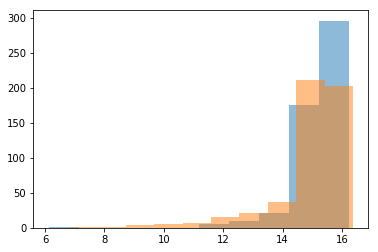

In [672]:
plt.hist(dry['ERAqmean'], alpha=0.5, bins=10)
plt.hist(wet['ERAqmean'], alpha=0.5, bins=10)

In [673]:
print('DRY', np.mean(dry['ERAqmean']))
print('WET', np.mean(wet['ERAqmean']))

DRY 15.172121807465615
WET 14.928277227722766


In [747]:
qwetness = wetness[(wetness['ERAqmean']>=13.5)]

In [751]:
print(np.percentile(qwetness['SMmean0'],[15,50,85]))

[-6.68283372 -3.028666    0.35419379]


In [768]:
np.sum((qwetness['SMmean0']<=-6.7) &(qwetness['SMmean-1']<=-0.01))

251

In [769]:
drytest = qwetness[(qwetness['SMmean0']<=-6.7) &(qwetness['SMmean-1']<=-0.01)]

In [770]:
drytest['date'] = pd.to_datetime(drytest[['year','month','day']])

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [755]:
uni, count = np.unique(drytest['date'], return_counts=True)

In [756]:
count

array([ 1, 14,  3,  9,  4,  1,  2,  7, 14,  1,  2,  5,  6,  2,  2,  1,  1,
        1,  5,  2,  1, 17,  2,  8,  8,  4,  1,  2,  1,  8,  1,  4,  3,  1,
        5,  3,  1,  4,  6,  4,  1, 10,  2, 15,  6,  1,  8,  5,  2,  8,  1,
        1,  1,  3,  2,  2,  7,  4, 10,  6,  1])

In [757]:
len(uni)

61

In [772]:
np.sum((qwetness['SMmean0']>=0.4) &(qwetness['SMmean-1']>=-0.01))

192

In [773]:
wettest = qwetness[(qwetness['SMmean0']>=0.4) &(qwetness['SMmean-1']>=-0.01)]

In [774]:
wettest['date'] = pd.to_datetime(wettest[['year','month','day']])

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [775]:
len(np.unique(wettest['date']))

71

(array([24., 33., 42., 19., 32., 17., 12.,  8.,  4.,  1.]),
 array([10.27808945, 11.0316763 , 11.78526314, 12.53884999, 13.29243684,
        14.04602368, 14.79961053, 15.55319738, 16.30678422, 17.06037107,
        17.81395792]),
 <a list of 10 Patch objects>)

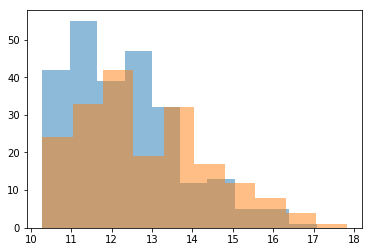

In [776]:
plt.hist(drytest['lat'], alpha=0.5)
plt.hist(wettest['lat'], alpha=0.5)

(array([ 6.,  1.,  0.,  3., 13., 22., 52., 37., 23., 23.]),
 array([14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. ]),
 <a list of 10 Patch objects>)

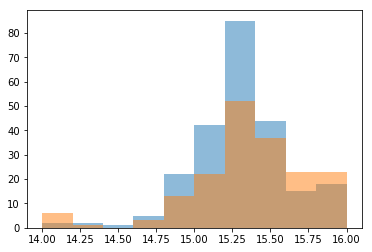

In [777]:
plt.hist(drytest['ERAqmean'], alpha=0.5, bins=10, range=(14,16))
plt.hist(wettest['ERAqmean'], alpha=0.5, bins=10, range=(14,16))

In [778]:
print('DRY', np.mean(drytest['ERAqmean']))
print('WET', np.mean(wettest['ERAqmean']))

DRY 15.317211155378487
WET 15.27796875


(array([ 10.,   0.,   0.,  83.,   0.,   0., 231.,   0.,   0., 136.]),
 array([6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <a list of 10 Patch objects>)

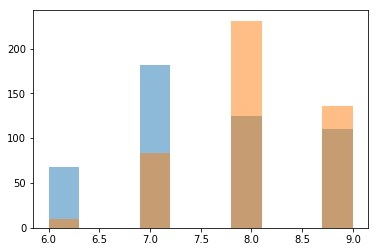

In [725]:
plt.hist(drytest['month'], alpha=0.5)
plt.hist(wettest['month'], alpha=0.5)

### We get very few wet cases in June 

Text(0.5,1,'Core frequency binned by month')

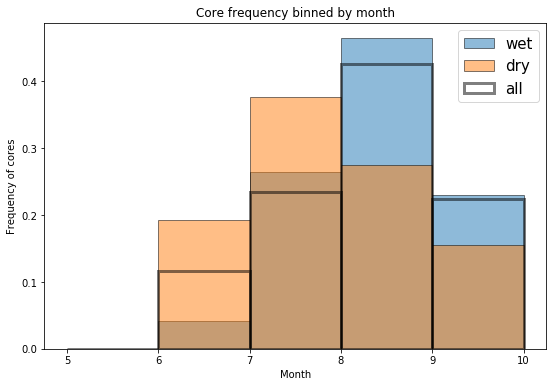

In [65]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.month, alpha=0.5, label='wet', edgecolor='k', bins=5, range=(5,10))
u_plot.hist_freq(ax, dry.month, alpha=0.5, label='dry', edgecolor='k', bins=5, range=(5,10))
u_plot.hist_freq(ax, msgopen.month, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=5, range=(5,10), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Month')
plt.title('Core frequency binned by month')

### The dry cases tend to occur further south - as expected from main occurence during June/July
### The wet case doesn't show such a preference

Text(0.5,1,'Core frequency binned by latitude')

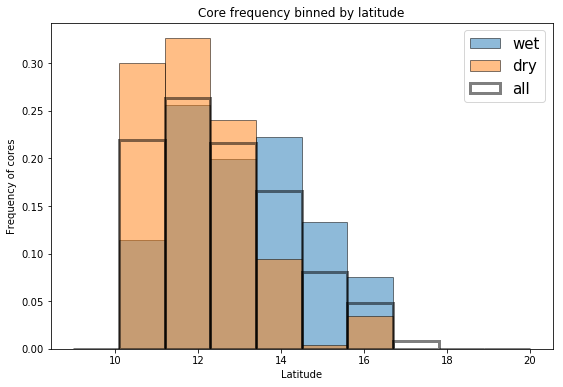

In [46]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.lat, alpha=0.5, label='wet', edgecolor='k', bins=10, range=(9,20))
u_plot.hist_freq(ax, dry.lat, alpha=0.5, label='dry', edgecolor='k', bins=10, range=(9,20))
u_plot.hist_freq(ax, msgopen.lat, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=10, range=(9,20), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Latitude')
plt.title('Core frequency binned by latitude')

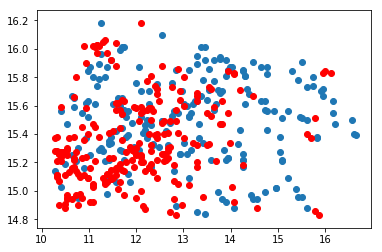

In [49]:
plt.scatter(wet.lat,wet.ERAqmean)
plt.scatter(dry.lat, dry.ERAqmean, color='r')

In [144]:
topo = xr.open_dataarray(cnst.network_data + 'data/ancils_python/lsta_corr_topo.nc')
topo = topo.sel(lat=slice(9,16))
h = topo.mean(dim='lat')

### Overall core frequency follows topography. Would have to look into dry-core case around 5W

Text(0.5,1,'Core frequency binned by longitude')

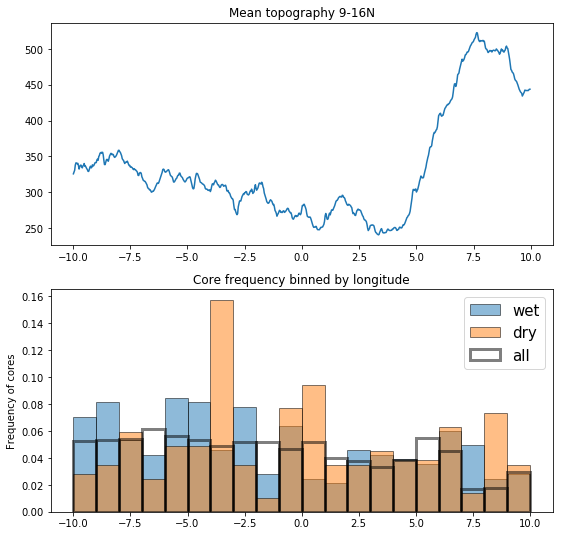

In [145]:
f= plt.figure(figsize=(9,9))

ax = f.add_subplot(211)
ax.plot(h.lon,h)
plt.title('Mean topography 9-16N')

ax = f.add_subplot(212)
u_plot.hist_freq(ax, wet.lon, alpha=0.5, label='wet', edgecolor='k', bins=20, range=(-10,10))
u_plot.hist_freq(ax, dry.lon, alpha=0.5, label='dry', edgecolor='k', bins=20, range=(-10,10))
u_plot.hist_freq(ax, msgopen.lon, alpha=0.5, label='all', edgecolor='k', linewidth=3,  bins=20, range=(-10,10), facecolor='None')
plt.legend(fontsize=15)
#ax.plot(h.lon, h)
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.title('Core frequency binned by longitude')

### Atmospheric conditions associated with the dry case favour shear and therefore organisation into bigger storms? 

Text(0.5,1,'Core frequency binned by storm area')

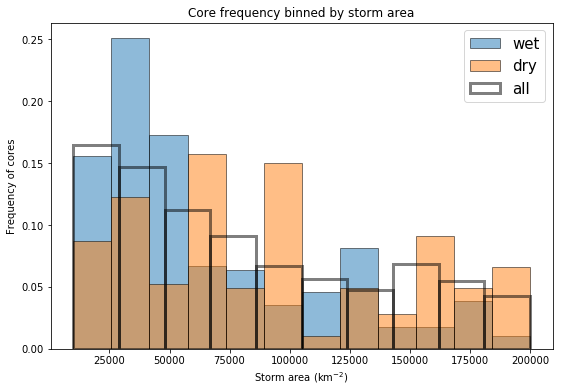

In [146]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.area, alpha=0.5, label='wet', edgecolor='k', bins=12, range=(10000,200000))
u_plot.hist_freq(ax, dry.area, alpha=0.5, label='dry', edgecolor='k', bins=12, range=(10000,200000))
u_plot.hist_freq(ax, msgopen.area, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=10, range=(10000,200000), facecolor='None')

plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Storm area (km$^{-2}$)')
plt.title('Core frequency binned by storm area')

In [94]:
np.mean(wet.area)

75118.12749003984

In [95]:
np.mean(dry.area)

118019.9806949807

In [96]:
(np.mean(dry.area) - np.mean(wet.area)) / np.mean(wet.area)

0.5711251682974838

In [ ]:
plt.scatter